In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [6]:
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
X = data.drop(columns=['deposit'])
y = data['deposit']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (8929, 16)
Number transactions y_train dataset:  (8929,)
Number transactions X_test dataset:  (2233, 16)
Number transactions y_test dataset:  (2233,)


In [46]:
onehot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','day','poutcome']


def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False) # prefix give name
        df = df.drop(x, axis = 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [47]:
X_train_one = dummy_df(X_train, onehot)
print(X_train_one.shape)


X_test_one = dummy_df(X_test, onehot)
print(X_test_one.shape)

(8929, 81)
(2233, 81)


# Logistic Regression

In [48]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [49]:
logreg.fit(X_train_one, y_train)
y_pred_logreg = logreg.predict(X_test_one)
print(f'Logistic Regression Model Accuracy: {accuracy_score(y_test, y_pred_logreg)}')

Logistic Regression Model Accuracy: 0.8047469771607703


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
#confusion matrix
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred_logreg)}')


print('\n')

# Classification report
print(f'Classification Report: \n{classification_report(y_test,y_pred_logreg)}')

Confusion Matrix: [[962 213]
 [223 835]]


Classification Report: 
              precision    recall  f1-score   support

          no       0.81      0.82      0.82      1175
         yes       0.80      0.79      0.79      1058

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



Text(50.722222222222214, 0.5, 'Actual Label')

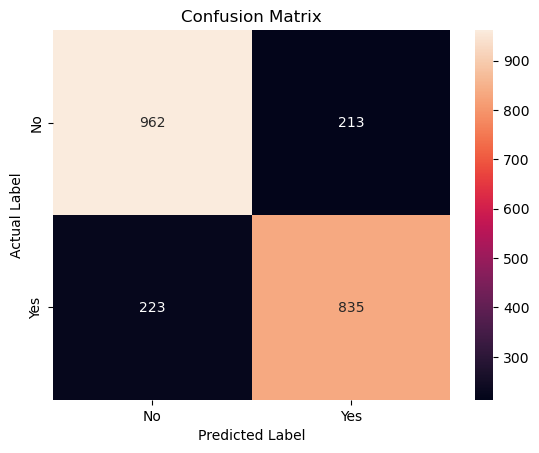

In [51]:
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_logreg), index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Decision Tree Regression

In [52]:
labelencoder = LabelEncoder()
y_train_encoded = labelencoder.fit_transform(y_train)
y_test_encoded = labelencoder.transform(y_test)

In [53]:
#Decision Regressor

dr = DecisionTreeRegressor()
dr.fit(X_train_one, y_train_encoded)
y_pred_dr = dr.predict(X_test_one)
print(f'Decision Tree Regression Model Accuracy: {accuracy_score(y_test_encoded, y_pred_dr)}')


Decision Tree Regression Model Accuracy: 0.7823555754590238


In [54]:
#confusion matrix
print(f'Confusion Matrix: {confusion_matrix(y_test_encoded, y_pred_dr)}')


print('\n')

# Classification report
print(f'Classification Report: \n{classification_report(y_test_encoded, y_pred_dr)}')

Confusion Matrix: [[925 250]
 [236 822]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1175
           1       0.77      0.78      0.77      1058

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



Text(50.722222222222214, 0.5, 'Actual Label')

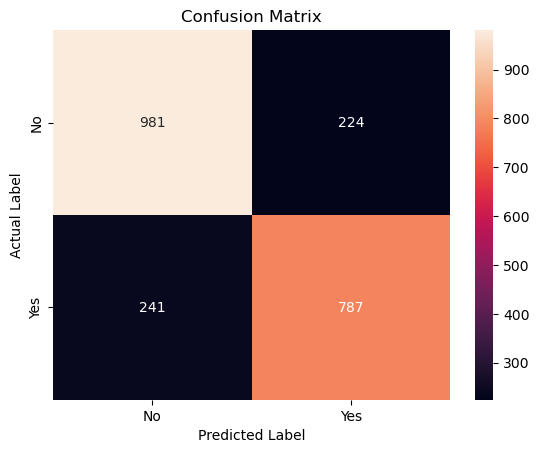

In [44]:
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(confusion_matrix(y_test_encoded, y_pred_dr), index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

for k in [3, 5, 7, 9]:
    for weight in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train_one, y_train_encoded)
        y_pred_knn = knn.predict(X_test_one)
        print(f'KNN Accuracy Score for {k} and {weight}: {accuracy_score(y_test_encoded, y_pred_knn)}')

C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 3 and uniform: 0.7411553963278101


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 3 and distance: 0.7411553963278101


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 5 and uniform: 0.7519032691446484


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 5 and distance: 0.7519032691446484


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 7 and uniform: 0.7595163457232422


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 7 and distance: 0.7595163457232422


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 9 and uniform: 0.761307657859382
KNN Accuracy Score for 9 and distance: 0.761307657859382


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# StandardScaler with Logistic Regression

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_one)
X_test_scaled = scaler.transform(X_test_one)
logreg.fit(X_train_scaled, y_train)
y_pred_scaled_logreg = logreg.predict(X_test_scaled)
accuracy_score(y_test, y_pred_scaled_logreg)

0.8275862068965517

In [75]:
#confusion matrix
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred_scaled_logreg)}')


print('\n')

# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred_scaled_logreg)}')

Confusion Matrix: [[993 182]
 [203 855]]


Classification Report: 
              precision    recall  f1-score   support

          no       0.83      0.85      0.84      1175
         yes       0.82      0.81      0.82      1058

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



Text(50.722222222222214, 0.5, 'Actual Label')

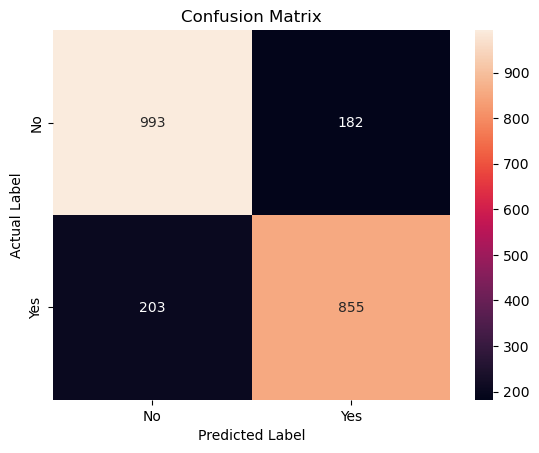

In [74]:
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_scaled_logreg), index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# StandardScaler with Decision Tree Regression

In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_one)
X_test_scaled = scaler.transform(X_test_one)
dr.fit(X_train_scaled, y_train_encoded)
y_pred_dr = logreg.predict(X_test_scaled)
accuracy_score(y_test, y_pred_dr)

0.8275862068965517

In [76]:
from sklearn.neighbors import KNeighborsClassifier

for k in [3, 5, 7, 9]:
    for weight in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train_scaled, y_train_encoded)
        y_pred_knn = knn.predict(X_test_scaled)
        print(f'KNN Accuracy Score for {k} and {weight}: {accuracy_score(y_test_encoded, y_pred_knn)}')

C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 3 and uniform: 0.7111509180474698


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 3 and distance: 0.7111509180474698


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 5 and uniform: 0.7313031795790417


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 5 and distance: 0.7313031795790417


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 7 and uniform: 0.729064039408867


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 7 and distance: 0.729064039408867


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy Score for 9 and uniform: 0.7263770712046574
KNN Accuracy Score for 9 and distance: 0.7263770712046574


C:\Users\srinadh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [77]:
from imblearn.over_sampling import SMOTE

X_train_scaled = scaler.fit_transform(X_train_one)
X_test_scaled = scaler.transform(X_test_one)

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_smote_lg = logreg.predict(X_test_scaled)

accuracy_score(y_test, y_pred_smote_lg)

0.8284818629646216

Text(50.722222222222214, 0.5, 'Actual Label')

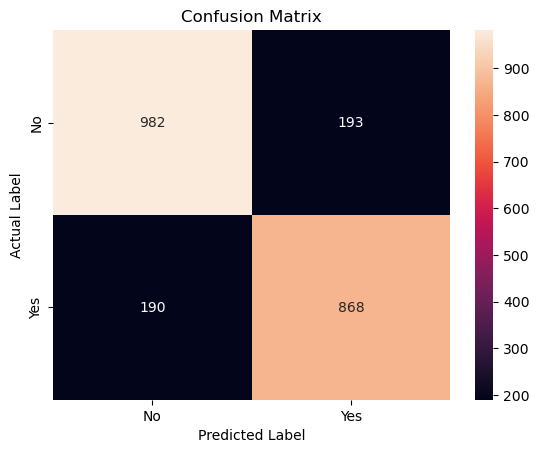

In [79]:
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_smote_lg), index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")